# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.


In [7]:
import pandas as pd 
df = pd.read_csv('credit_card_fraud.csv') 
df.head(100)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [8]:

# Display general information about the data
df.info()

# Display the first few rows to understand the data's content
df.head()

# Describe the statistical summary of numerical columns
df.describe()

# Check for missing values
df.isnull().sum()

# Check for unique values in 'is_fraud' to confirm class imbalance
df['is_fraud'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

is_fraud
0    337825
1      1782
Name: count, dtype: int64

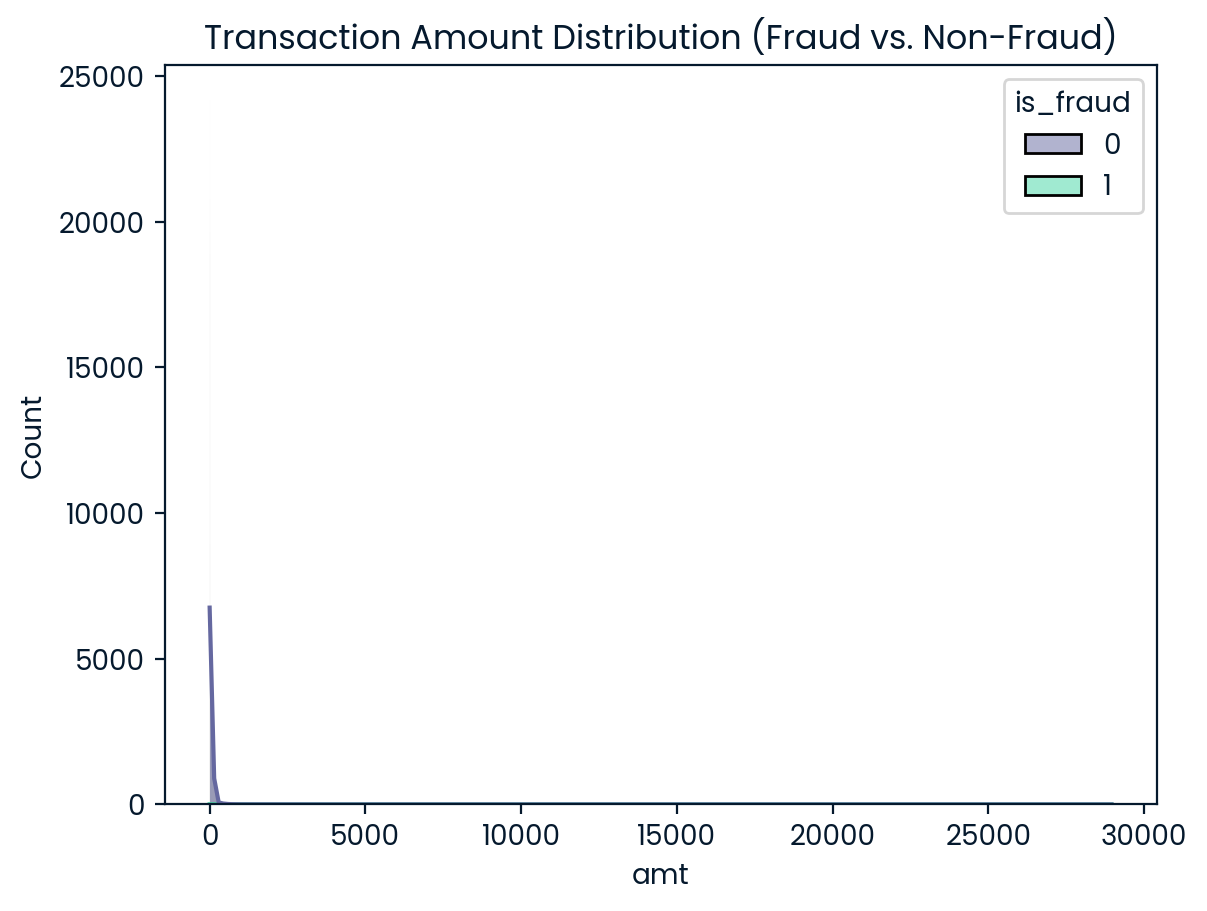

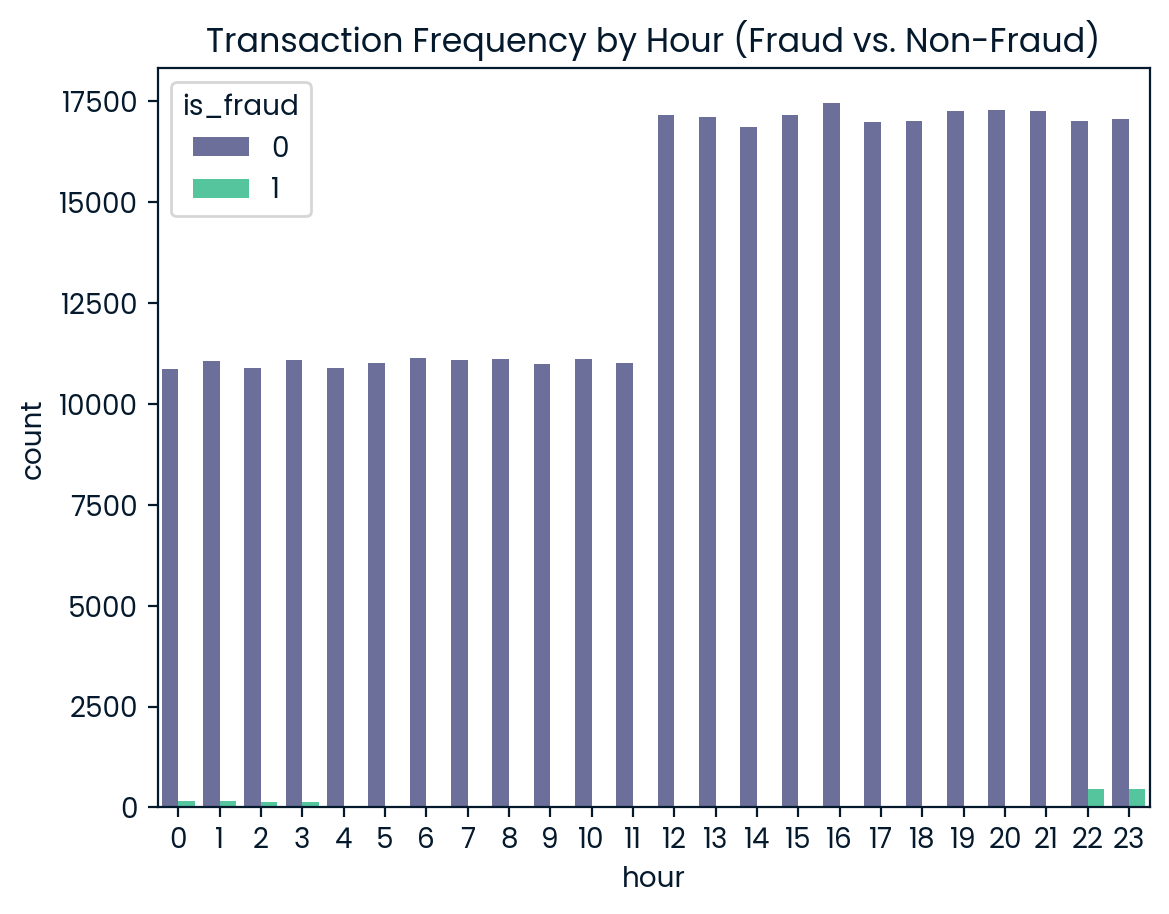

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'amt' for fraud and non-fraud transactions
sns.histplot(data=df, x='amt', hue='is_fraud', kde=True)
plt.title("Transaction Amount Distribution (Fraud vs. Non-Fraud)")
plt.show()

# Visualize the distribution of 'trans_date_trans_time' to identify any patterns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

sns.countplot(data=df, x='hour', hue='is_fraud')
plt.title("Transaction Frequency by Hour (Fraud vs. Non-Fraud)")
plt.show()

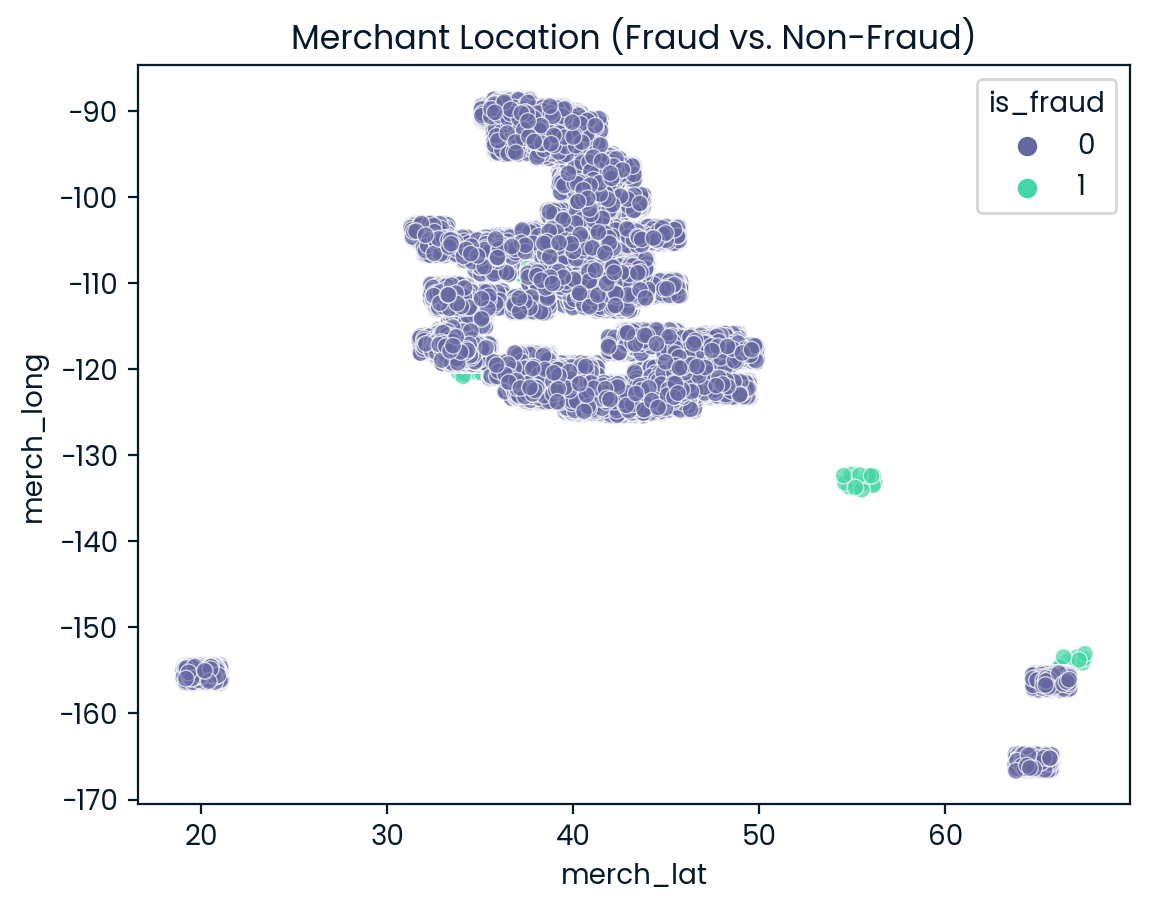

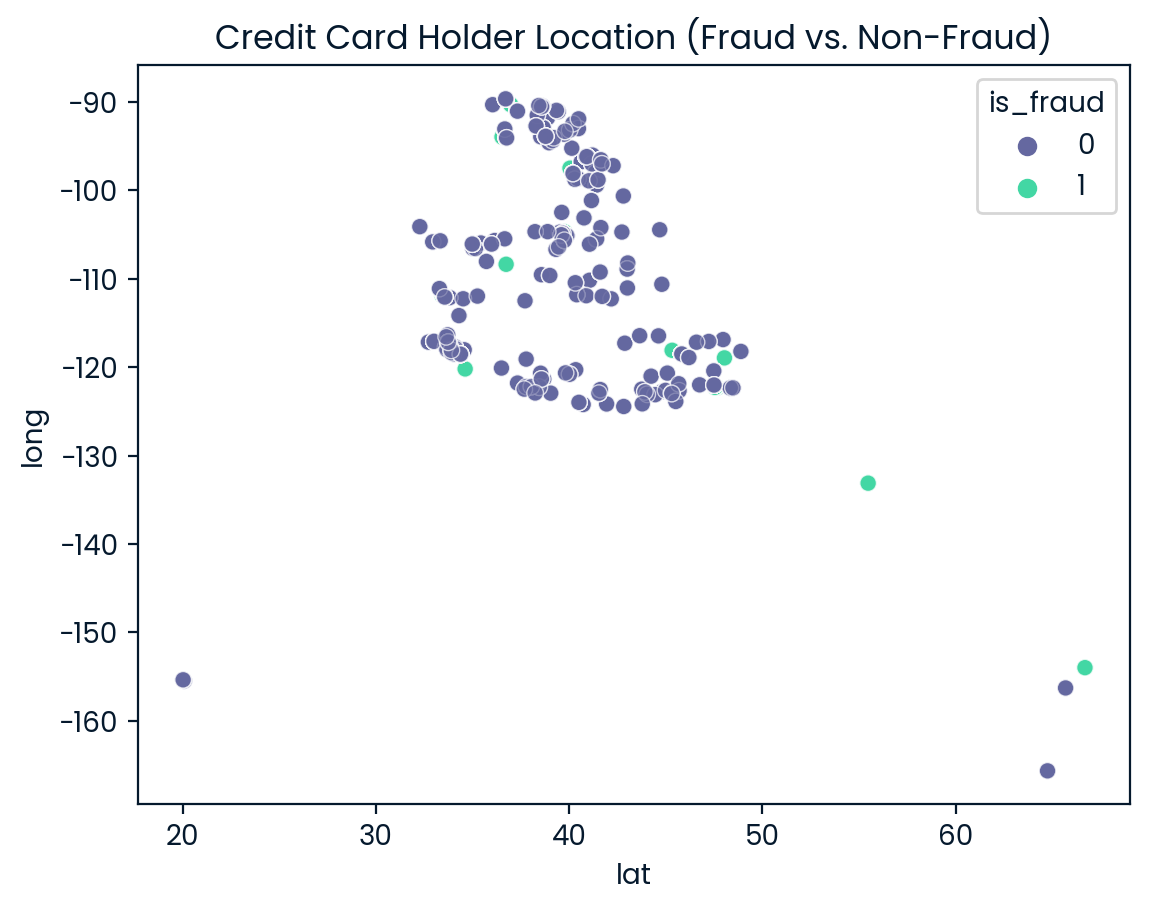

In [11]:
# Scatter plot for merchant locations (latitude and longitude)
sns.scatterplot(data=df, x='merch_lat', y='merch_long', hue='is_fraud', alpha=0.7)
plt.title("Merchant Location (Fraud vs. Non-Fraud)")
plt.show()

# Scatter plot for credit card holder locations (latitude and longitude)
sns.scatterplot(data=df, x='lat', y='long', hue='is_fraud', alpha=0.7)
plt.title("Credit Card Holder Location (Fraud vs. Non-Fraud)")
plt.show()


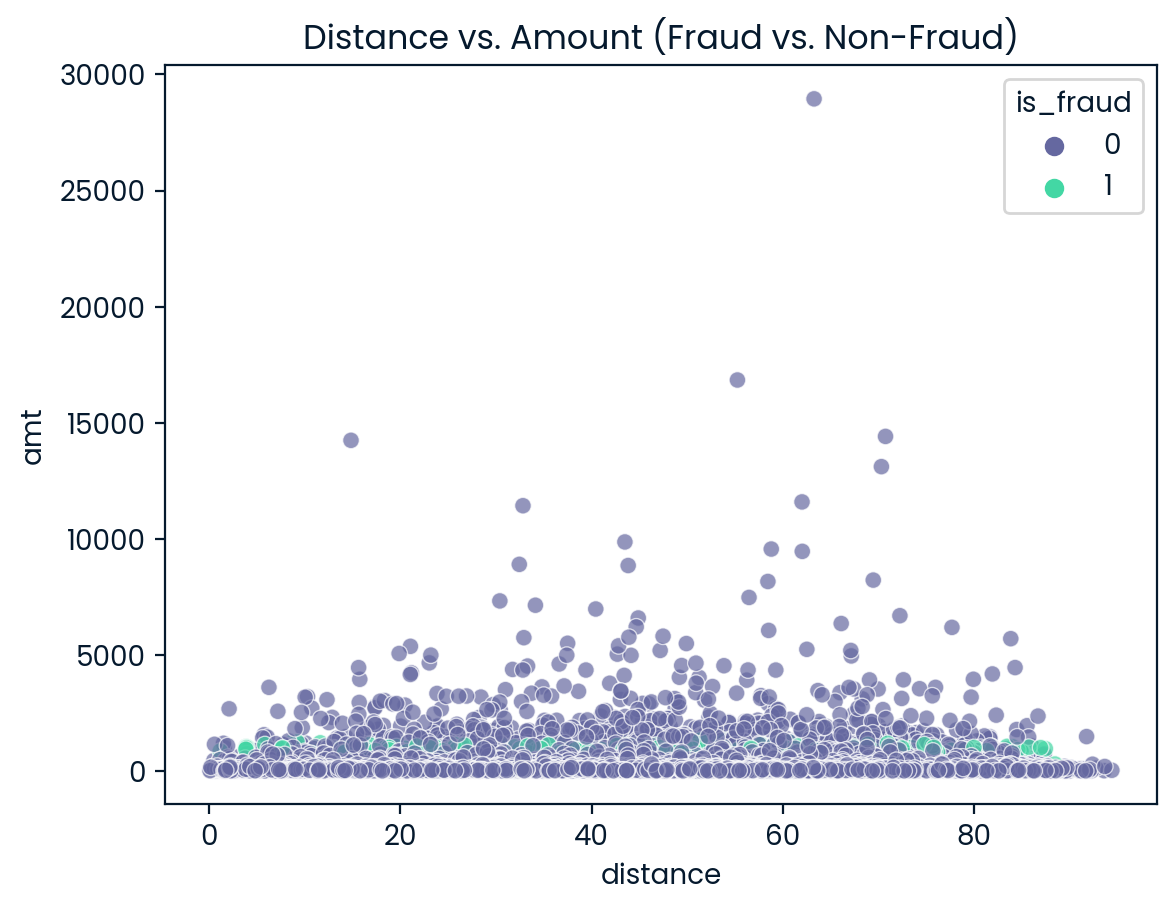

In [12]:
# Calculate the distance between the credit card holder and merchant
from geopy.distance import geodesic

def calculate_distance(row):
    card_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(card_location, merchant_location).miles

df['distance'] = df.apply(calculate_distance, axis=1)

# Scatter plot for distance vs. amount
sns.scatterplot(data=df, x='distance', y='amt', hue='is_fraud', alpha=0.7)
plt.title("Distance vs. Amount (Fraud vs. Non-Fraud)")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Fixed the syntax error here
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the features and labels
features = ['amt', 'city_pop', 'hour', 'distance']  # Add more features as needed
X = df[features]
y = df['is_fraud']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()  # Fixed the syntax error here
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101246     93]
 [   311    233]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101339
           1       0.71      0.43      0.54       544

    accuracy                           1.00    101883
   macro avg       0.86      0.71      0.77    101883
weighted avg       1.00      1.00      1.00    101883

